In [1]:
import requests
import pandas as pd
import numpy as np
from network import NeuralNetwork
from model.layers.dense import AdamDense, Dense
from model.activations.activation import *
from model.losses import *
import numpy as np
from influx import get_influx_data



In [2]:
def min_max_scale(column):
    return column / 10000

In [3]:
try:
    solar = pd.DataFrame(get_influx_data().raw["series"][0]["values"], columns=["time", "mean_value"])
    print("using influx")
except:
    solar = pd.read_csv(f'./data_daily.csv') 
    print("using csv")
solar["mean_value"] = solar["mean_value"] / 100
solar = solar.dropna()
solar['time'] = pd.to_datetime(solar['time'], yearfirst=True, utc=True)


url = f"https://archive-api.open-meteo.com/v1/archive?latitude=49.7751150&longitude=13.3604831&start_date={solar['time'].min().strftime('%Y-%m-%d')}&end_date={solar['time'].max().strftime('%Y-%m-%d')}&daily=weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,precipitation_hours,snowfall_sum,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,cloud_cover_mean,cloud_cover_max,cloud_cover_min,dew_point_2m_mean,dew_point_2m_max,dew_point_2m_min,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean,relative_humidity_2m_max,relative_humidity_2m_min,snowfall_water_equivalent_sum,wind_gusts_10m_mean,wind_gusts_10m_min,wind_speed_10m_mean,wind_speed_10m_min,wet_bulb_temperature_2m_mean,wet_bulb_temperature_2m_max,wet_bulb_temperature_2m_min,vapour_pressure_deficit_max&timezone=GMT"


pred = pd.DataFrame(requests.get(url).json()["daily"])
pred["date"] = pd.to_datetime(pred["time"])
pred = pred.drop(["time"], axis=1)
pred["month"] = pred["date"].dt.month
pred["day"] = pred["date"].dt.day
pred["year"] = pred["date"].dt.year
pred = pred.drop(["date"], axis=1)
solar["day"] = solar["time"].dt.day
solar["month"] = solar["time"].dt.month
solar["year"] = solar["time"].dt.year
solar = solar.drop(["time"], axis=1)
data = pd.merge(pred, solar, on=["day", "month", "year"], how="inner")
data = data.drop(["year", "day"], axis=1)
columns_to_scale = data.columns.drop(["mean_value", "month"])  # Exclude 'mean_value' from scaling
data[columns_to_scale] = data[columns_to_scale].apply(min_max_scale)
data["month"] = np.cos((np.pi * data["month"]) / 6)
print(data["month"])

using csv
0     -8.660254e-01
1     -8.660254e-01
2     -8.660254e-01
3     -8.660254e-01
4     -8.660254e-01
           ...     
602    6.123234e-17
603    6.123234e-17
604    6.123234e-17
605    6.123234e-17
606    6.123234e-17
Name: month, Length: 607, dtype: float64


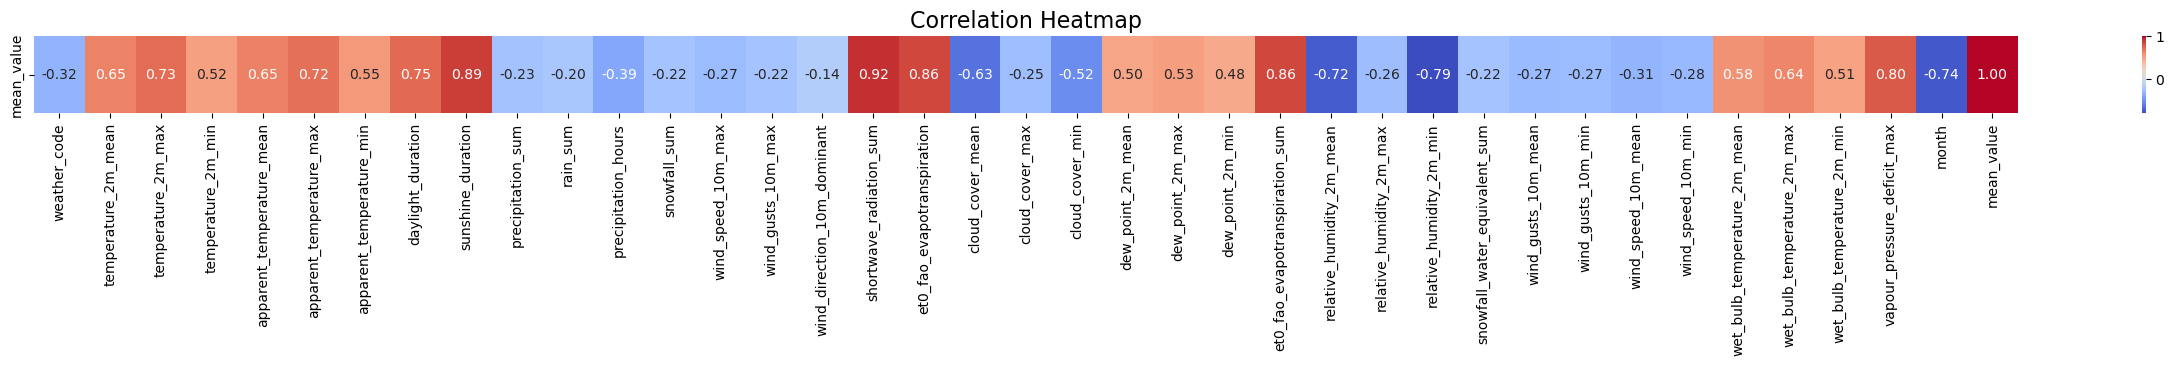

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(32, 1))
# sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
sns.heatmap(data.corr()[["mean_value"]].transpose(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.show()

In [5]:
pd.set_option('display.max_columns', None)
data = data.dropna()

data = data.sample(frac=1)
data

,weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,precipitation_hours,snowfall_sum,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,cloud_cover_mean,cloud_cover_max,cloud_cover_min,dew_point_2m_mean,dew_point_2m_max,dew_point_2m_min,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean,relative_humidity_2m_max,relative_humidity_2m_min,snowfall_water_equivalent_sum,wind_gusts_10m_mean,wind_gusts_10m_min,wind_speed_10m_mean,wind_speed_10m_min,wet_bulb_temperature_2m_mean,wet_bulb_temperature_2m_max,wet_bulb_temperature_2m_min,vapour_pressure_deficit_max,month,mean_value
529,0.0003,-0.00030,-0.00001,-0.00061,-0.00066,-0.00039,-0.00093,3.069114,1.792814,0.00000,0.00000,0.0000,0.0,0.00097,0.00194,0.0014,0.000442,0.000042,0.0064,0.0100,0.0002,-0.00076,-0.00069,-0.00085,0.000042,0.0071,0.0087,0.0053,0.0,0.00103,0.00022,0.00037,0.00002,-0.00051,-0.00034,-0.00071,0.000028,8.660254e-01,0.058
17,0.0055,0.00167,0.00202,0.00129,0.00156,0.00189,0.00116,5.458731,2.187125,0.00039,0.00039,0.0007,0.0,0.00232,0.00482,0.0207,0.001192,0.000235,0.0078,0.0100,0.0008,0.00130,0.00160,0.00104,0.000235,0.0080,0.0094,0.0056,0.0,0.00299,0.00180,0.00144,0.00092,0.00143,0.00164,0.00113,0.000104,-5.000000e-01,0.067
401,0.0003,0.00218,0.00272,0.00170,0.00203,0.00254,0.00155,4.733828,4.314999,0.00000,0.00000,0.0000,0.0,0.00160,0.00342,0.0100,0.001879,0.000472,0.0048,0.0098,0.0000,0.00099,0.00111,0.00087,0.000472,0.0048,0.0066,0.0032,0.0,0.00220,0.00079,0.00108,0.00043,0.00148,0.00169,0.00124,0.000242,-1.836970e-16,0.187
302,0.0061,0.00147,0.00189,0.00118,0.00138,0.00185,0.00109,5.759349,2.520000,0.00036,0.00036,0.0009,0.0,0.00182,0.00371,0.0204,0.001494,0.000240,0.0083,0.0100,0.0006,0.00117,0.00134,0.00105,0.000240,0.0083,0.0092,0.0064,0.0,0.00212,0.00076,0.00095,0.00037,0.00127,0.00147,0.00109,0.000079,-8.660254e-01,0.119
464,0.0003,0.00044,0.00083,0.00010,0.00013,0.00051,-0.00025,3.384749,0.736986,0.00000,0.00000,0.0000,0.0,0.00118,0.00248,0.0067,0.000384,0.000055,0.0080,0.0100,0.0000,0.00024,0.00038,0.00005,0.000055,0.0087,0.0096,0.0068,0.0,0.00194,0.00090,0.00096,0.00024,0.00032,0.00052,0.00006,0.000035,8.660254e-01,0.009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0.0000,-0.00056,-0.00002,-0.00084,-0.00109,-0.00055,-0.00144,3.025797,2.553729,0.00000,0.00000,0.0000,0.0,0.00166,0.00302,0.0040,0.000540,0.000077,0.0000,0.0004,0.0000,-0.00125,-0.00095,-0.00155,0.000077,0.0059,0.0079,0.0038,0.0,0.00247,0.00140,0.00128,0.00080,-0.00080,-0.00040,-0.00106,0.000037,8.660254e-01,0.080
516,0.0003,-0.00012,0.00013,-0.00030,-0.00055,-0.00033,-0.00072,2.942137,1.840875,0.00000,0.00000,0.0000,0.0,0.00139,0.00313,0.0227,0.000378,0.000037,0.0078,0.0100,0.0011,-0.00031,-0.00019,-0.00042,0.000037,0.0087,0.0094,0.0067,0.0,0.00244,0.00209,0.00119,0.00107,-0.00023,-0.00013,-0.00037,0.000022,1.000000e+00,0.046
449,0.0003,0.00103,0.00146,0.00069,0.00083,0.00135,0.00040,3.685463,1.431518,0.00000,0.00000,0.0000,0.0,0.00136,0.00270,0.0068,0.000497,0.000083,0.0061,0.0100,0.0017,0.00079,0.00108,0.00060,0.000083,0.0086,0.0094,0.0072,0.0,0.00189,0.00065,0.00097,0.00036,0.00087,0.00118,0.00062,0.000046,5.000000e-01,0.019
222,0.0003,0.00077,0.00123,0.00033,0.00046,0.00092,0.00002,4.188626,3.117189,0.00000,0.00000,0.0000,0.0,0.00192,0.00349,0.0249,0.001168,0.000163,0.0090,0.0100,0.0006,0.00032,0.00047,0.00015,0.000163,0.0075,0.0095,0.0048,0.0,0.00210,0.00097,0.00104,0.00044,0.00052,0.00073,0.00028,0.000074,6.123234e-17,0.114


In [10]:


# data["month"] = (data['month']).apply(lambda x: abs(1 - abs(x - 6) / 5))


y = data["mean_value"]
X = data.drop(["mean_value"], axis=1)
X = X.to_numpy()
X =np.reshape(X, (X.shape[0],X.shape[1], 1))
y = np.reshape(y.to_numpy(), (y.shape[0], 1))
# network = [Dense(17,32), Softplus(), AdamDense(32, 64),  NormalizedTanh(),  AdamDense(64, 128),  Tanh(),  AdamDense(128, 1), Softplus()]
network = [Dense(38,64), Softplus(), Dense(64, 128),  Tanh(),  Dense(128, 32), Tanh(),  Dense(32, 16), Tanh(),  Dense(16, 1), Softplus()]
# network = [AdamDense(37,32), Softplus(), AdamDense(32, 16),  Tanh(),  AdamDense(16, 8), NormalizedTanh(),  AdamDense(8, 1), Softplus()]
# network = [Dense(38,32), Tanh(), Dense(32, 16),  Tanh(),  Dense(16, 8), Tanh(),  Dense(8, 1), Linear()]
n = NeuralNetwork(network)

trained_n = n.train(huber_loss, huber_loss_prime, X, y, epochs=100, learning_rate=0.001, verbose=False)


Complete Validation on 10/100 epoch, actual=966.0, prediction=1104.0, miss=399.0, percentage=239.0%, valid_error=0.07783486436769374, error=0.001390082647126359
Complete Validation on 20/100 epoch, actual=966.0, prediction=1043.0, miss=314.0, percentage=189.0%, valid_error=0.0479009569273523, error=0.000850402167937853
Complete Validation on 30/100 epoch, actual=966.0, prediction=1015.0, miss=288.0, percentage=170.0%, valid_error=0.03930747789484862, error=0.0006950870326278557
Complete Validation on 40/100 epoch, actual=966.0, prediction=1007.0, miss=272.0, percentage=162.0%, valid_error=0.03467339331680302, error=0.0006027934563345005
Complete Validation on 50/100 epoch, actual=966.0, prediction=1007.0, miss=263.0, percentage=157.0%, valid_error=0.031197029447620917, error=0.0005378575958556683
Complete Validation on 60/100 epoch, actual=966.0, prediction=1004.0, miss=255.0, percentage=154.0%, valid_error=0.02895566767399746, error=0.0004964520832617138
Complete Validation on 70/100 

7

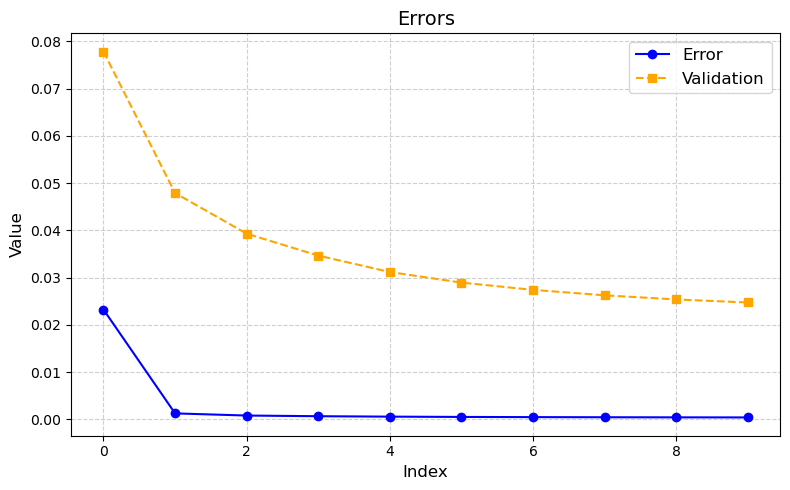

In [13]:
import matplotlib.pylab as plt

plt.figure(figsize=(8, 5))
plt.plot([n.error_rate[i] for i in range(len(n.error_rate)) if i == 0 or i % 10 == 0], label='Error', marker='o', linestyle='-', color='blue')
plt.plot(n.real_error, label='Validation', marker='s', linestyle='--', color='orange')

# Add title and labels
plt.title('Errors', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
from daily import train
import inspect
lines = inspect.getsource(train)
print(lines)

def train():
    try:
        solar = pd.DataFrame(get_influx_data().raw["series"][0]["values"], columns=["time", "mean_value"])
        print("using influx", flush=True)
    except:
        solar = pd.read_csv('./data_daily.csv') 
        print("using csv", flush=True)
    solar["mean_value"] = solar["mean_value"] / 100
    solar = solar.dropna()
    solar['time'] = pd.to_datetime(solar['time'], yearfirst=True, utc=True)

    url = f"https://archive-api.open-meteo.com/v1/archive?latitude=49.7751150&longitude=13.3604831&start_date={solar['time'].min().strftime('%Y-%m-%d')}&end_date={solar['time'].max().strftime('%Y-%m-%d')}&daily=weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,precipitation_hours,snowfall_sum,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,cl

In [9]:
train()

using csv


/mnt/d/Projects/Hasp/solar_prediction/app/model/activations/activation.py:97: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
/mnt/d/Projects/Hasp/solar_prediction/app/model/activations/activation.py:100: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


ValueError: cannot convert float NaN to integer